In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("C:/Praveena/Breakoutseesion/session4/NSMES1988.csv")

In [6]:
df.columns

Index(['Unnamed: 0', 'visits', 'nvisits', 'ovisits', 'novisits', 'emergency',
       'hospital', 'health', 'chronic', 'adl', 'region', 'age', 'gender',
       'married', 'school', 'income', 'employed', 'insurance', 'medicaid'],
      dtype='object')

In [7]:
df = df.drop(['Unnamed: 0'],axis=1)

In [8]:
df.columns

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'health', 'chronic', 'adl', 'region', 'age', 'gender', 'married',
       'school', 'income', 'employed', 'insurance', 'medicaid'],
      dtype='object')

In [9]:
df['age'] = df['age']*10

In [10]:
df['income'] = df['income']*10000

In [11]:
df.head()

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,normal,other,69.0,male,yes,6,28810.0,yes,yes,no
1,1,0,2,0,2,0,average,2,normal,other,74.0,female,yes,10,27478.0,no,yes,no
2,13,0,0,0,3,3,poor,4,limited,other,66.0,female,no,10,6532.0,no,no,yes
3,16,0,5,0,1,1,poor,2,limited,other,76.0,male,yes,3,6588.0,no,yes,no
4,3,0,0,0,0,0,average,2,limited,other,79.0,female,yes,6,6588.0,no,yes,no


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   float64
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(2), int64(8), object(8)
memory usage: 619.7+ KB


In [13]:
df['age'] = df['age'].astype('int16')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   int64  
 1   nvisits    4406 non-null   int64  
 2   ovisits    4406 non-null   int64  
 3   novisits   4406 non-null   int64  
 4   emergency  4406 non-null   int64  
 5   hospital   4406 non-null   int64  
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   int64  
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   int16  
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   int64  
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(1), int16(1), int64(8), object(8)
memory usage: 593.9+ KB


In [15]:
cat_features_list = df.select_dtypes(include='object').columns
cat_features_list

Index(['health', 'adl', 'region', 'gender', 'married', 'employed', 'insurance',
       'medicaid'],
      dtype='object')

In [16]:
num_features_list = df.select_dtypes(include=np.number).columns
num_features_list

Index(['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital',
       'chronic', 'age', 'school', 'income'],
      dtype='object')

Basic statistical measures for the numerical columns in the datasettiscal 

In [17]:
df_numbers = df[num_features_list]
df_numbers
df.describe()

,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25271.320468
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29246.476178
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,-10125.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9121.500000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


In [18]:
df.groupby(['employed'])[['hospital']].sum()

,hospital
employed,
no,1201
yes,103


Build a pivot table that shows all numerical measures with health column as an index

In [19]:
df_pivot = df.pivot_table(df[num_features_list],index=['health'])
df_pivot

,age,chronic,emergency,hospital,income,novisits,nvisits,ovisits,school,visits
health,,,,,,,,,,
average,73.849245,1.430892,0.223425,0.252779,25519.896449,0.548589,1.652323,0.691650,10.426617,5.510687
excellent,73.102041,0.749271,0.096210,0.099125,32774.114577,0.163265,1.588921,0.341108,11.329446,3.428571
poor,75.702166,2.736462,0.620939,0.691336,19051.624621,0.687726,1.418773,1.379061,8.783394,8.897112


Observation for the pivot table : Age is almost similar for all the health groups
             The higher the income the better the health condition
             The number of years education is higher then the health condition is better
             People with poor health has more no of hospital visits and higher chronic conditions

What is the median number of emergency room visits for each region and gender combination?

In [20]:
df.dtypes

visits         int64
nvisits        int64
ovisits        int64
novisits       int64
emergency      int64
hospital       int64
health        object
chronic        int64
adl           object
region        object
age            int16
gender        object
married       object
school         int64
income       float64
employed      object
insurance     object
medicaid      object
dtype: object

In [21]:
df.groupby(['gender','region'])[['emergency']].median()

emergency
gender region              
female midwest          0.0
       northeast        0.0
       other            0.0
       west             0.0
male   midwest          0.0
       northeast        0.0
       other            0.0
       west             0.0

Obseravtion : Most people don't have emergency visits

Get the number of individuals covered by Medicaid and its effect on the number of hospital stays

In [22]:
df_with_medicaid_stays = df.query('medicaid == "yes"')
len(df_with_medicaid_stays.query('hospital > 0'))

105

Choose proper plot size to demonstrate data points clearly
• Add plot and axis titles
• Use bmh or ggplot matplotlib style (hint: plt.style.use(‘ggplot'))

Build a histogram for every numerical column using subplots and report the columns that have a lot of outliers

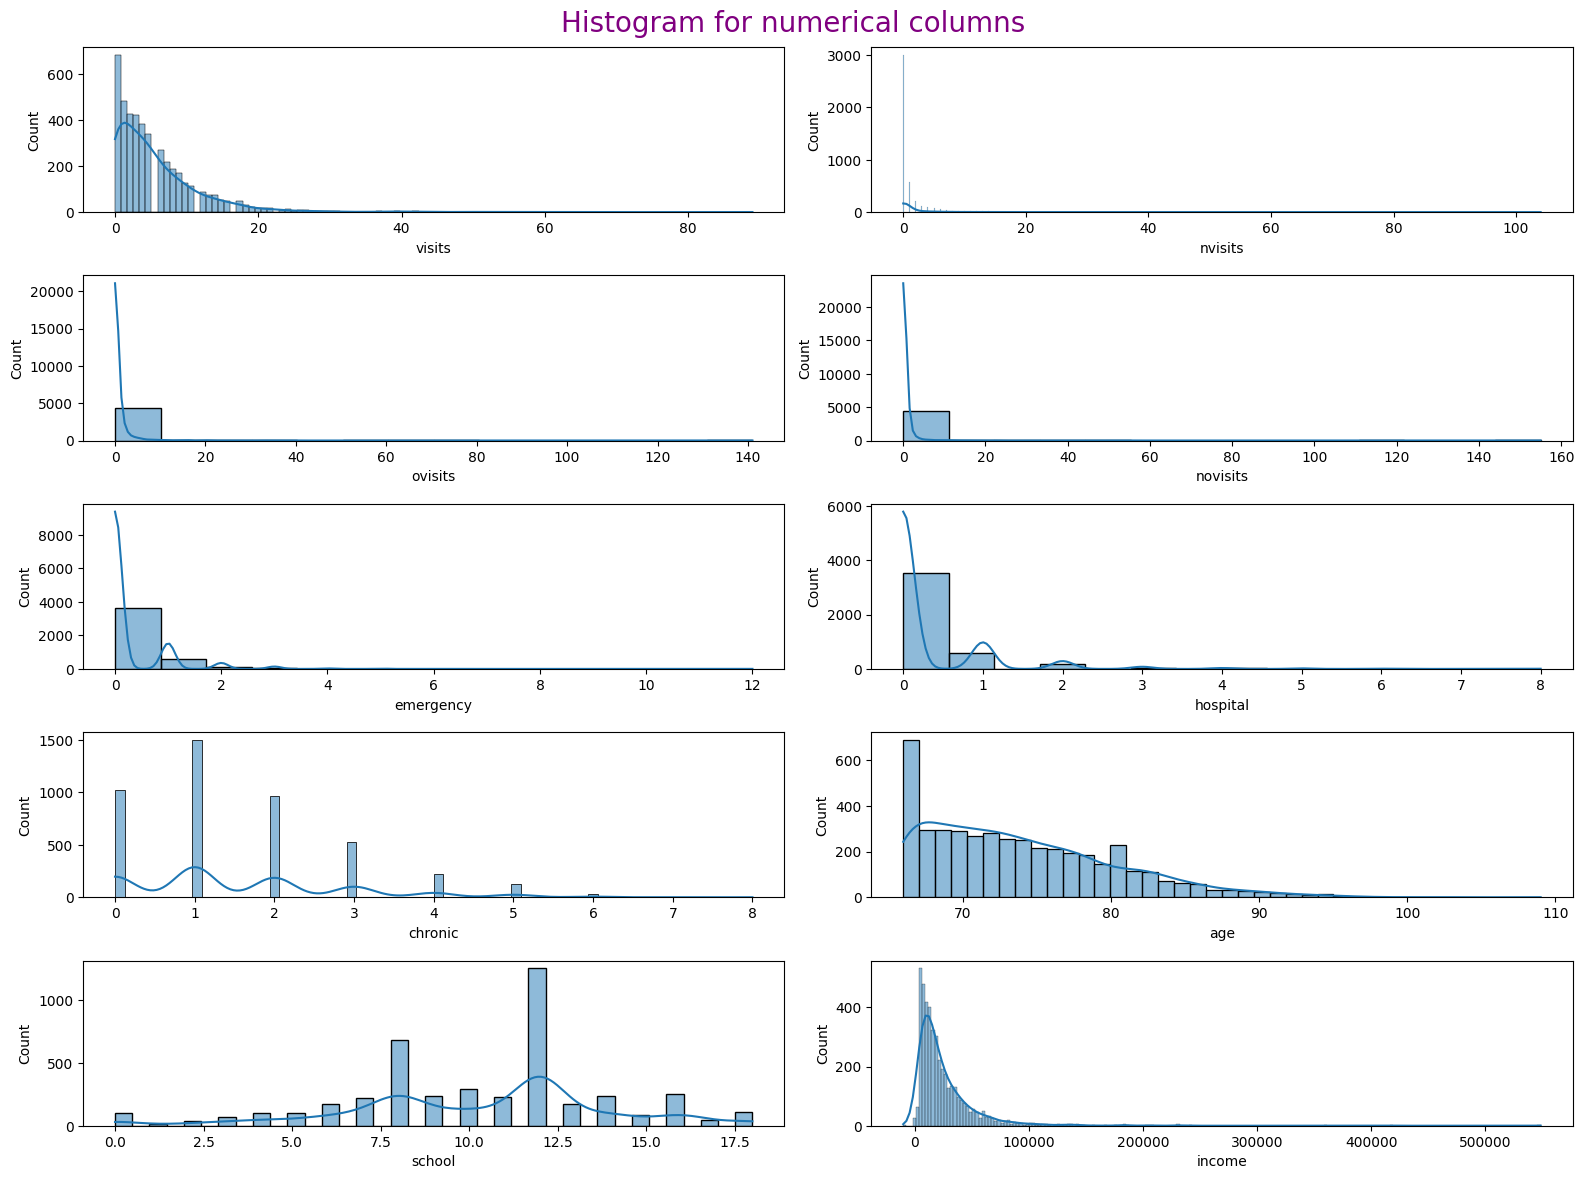

In [25]:
# define a column list


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,12))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(num_features_list):
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)

fig.suptitle('Histogram for numerical columns',fontsize=20, color='purple')
fig.tight_layout(pad=1.2, w_pad=1)




Observation : Income , age , hospital ,emergency, novisits, ovisits, visits

Perform box and whisker analysis based on the following categories:
• Different types of visits
• Gender
• Marital Status
• Employment Status

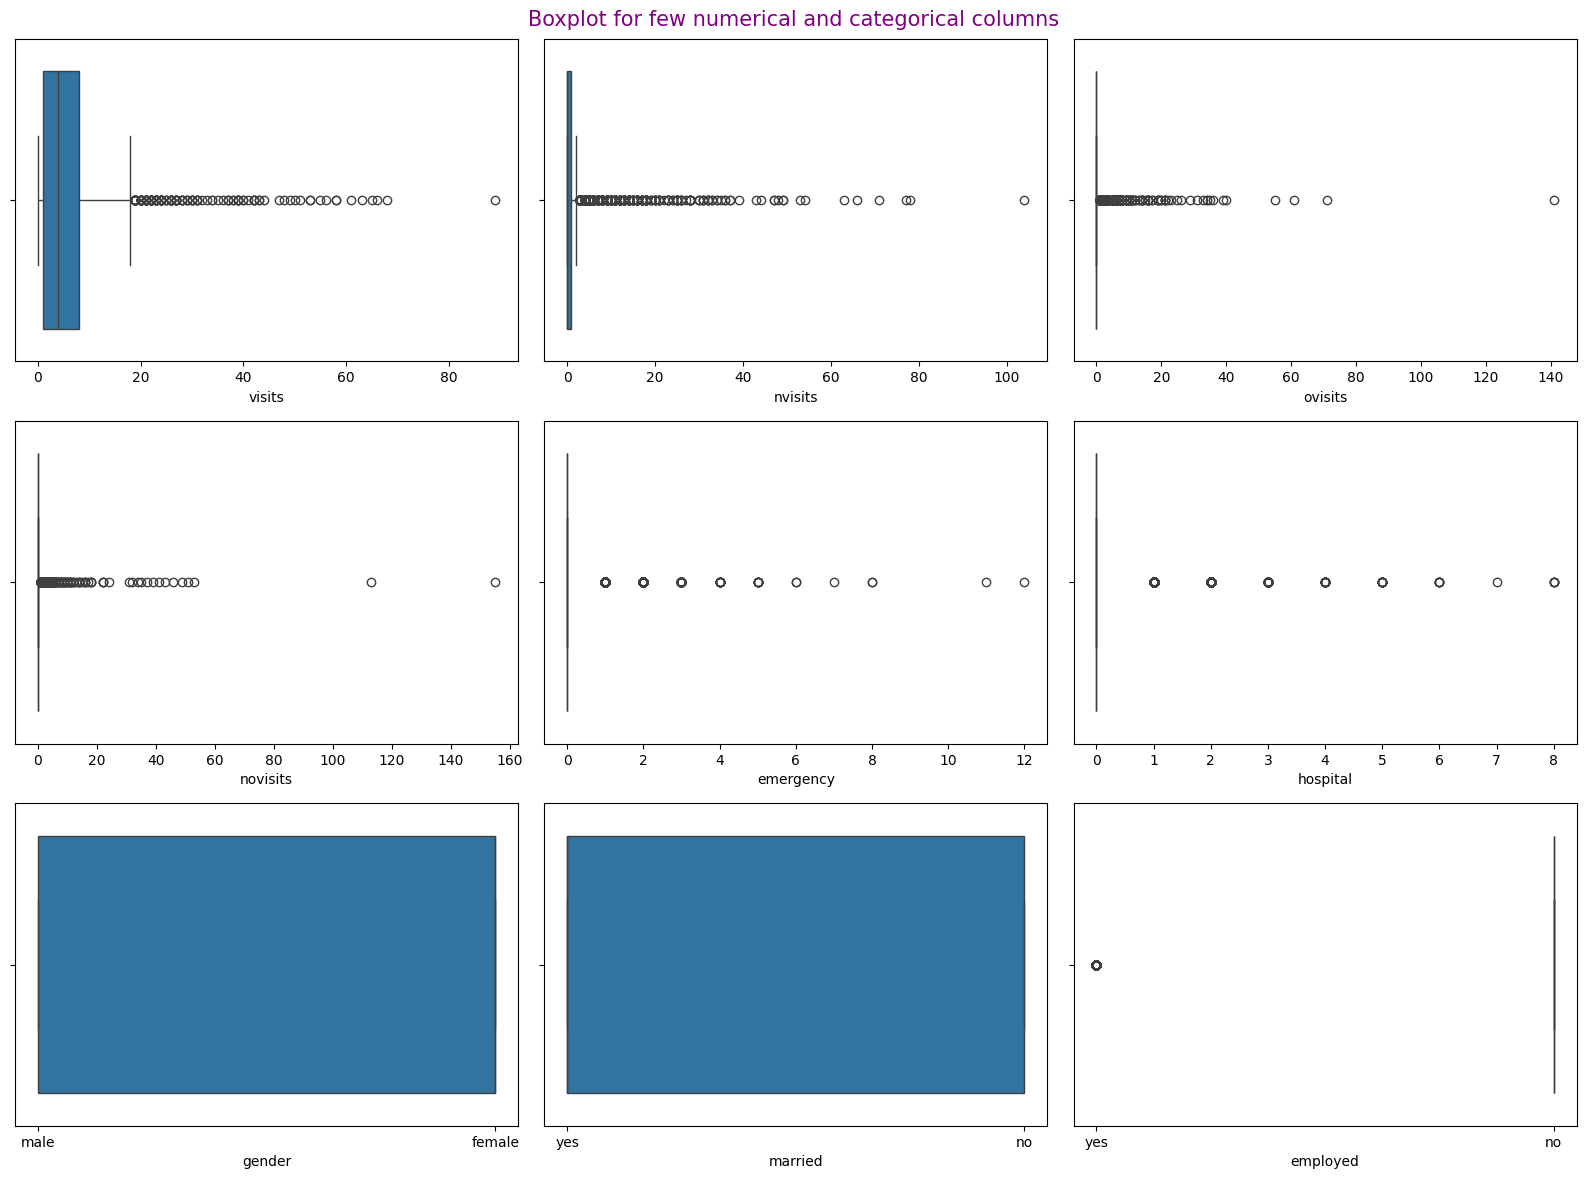

In [27]:
# define a column list
box_features_list = ['visits', 'nvisits', 'ovisits', 'novisits', 'emergency', 'hospital','gender', 'married', 'employed']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16,12))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(box_features_list):
    sns.boxplot(data=df, x=col, ax=axes[idx])

fig.suptitle('Boxplot for few numerical and categorical columns',fontsize=15, color='purple')
fig.tight_layout(pad=1.2, w_pad=1)

<Axes: xlabel='visits', ylabel='gender'>

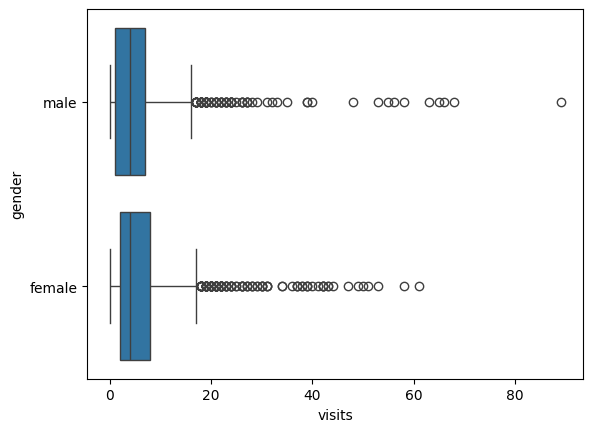

In [28]:
sns.boxplot(data=df,x='visits',y='gender')

Home work : Just do rework to build with one categorical for all the numeric columns

Generate a plot to view the number of individuals within each age group, separated by gender.

<Axes: xlabel='age', ylabel='Count'>

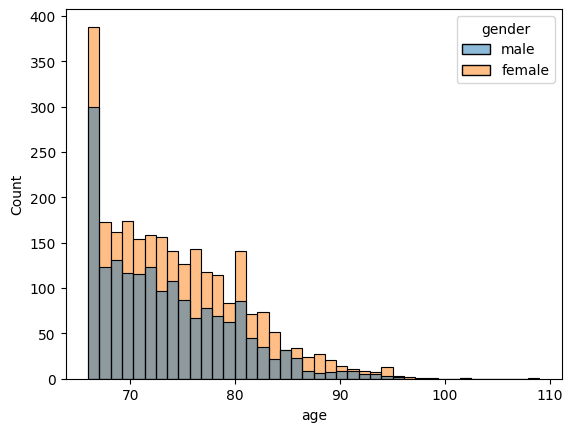

In [30]:
sns.histplot(data=df, x='age',hue='gender')

Observations: Count is more for female than male but the distribution is same

Build a plot to check if there’s a relationship between Age and number of physician’s office visits.

In [ ]:
sns.scatterplot()